# NASA NEO Dataset Analysis
This notebook explores the NASA dataset for Near-Earth Objects (NEOs) with a focus on the correlations among features, dimensionality reduction, and clustering of hazardous vs. non-hazardous NEOs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Load the dataset
nasa_df = pd.read_csv('nasa.csv')

# Initial exploration
nasa_df.info()
nasa_df.head()

C:\Users\corsi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Correlation Analysis
Understanding relationships among features and their independence assumptions is crucial. A correlation matrix is computed and visualized to examine how variables relate.

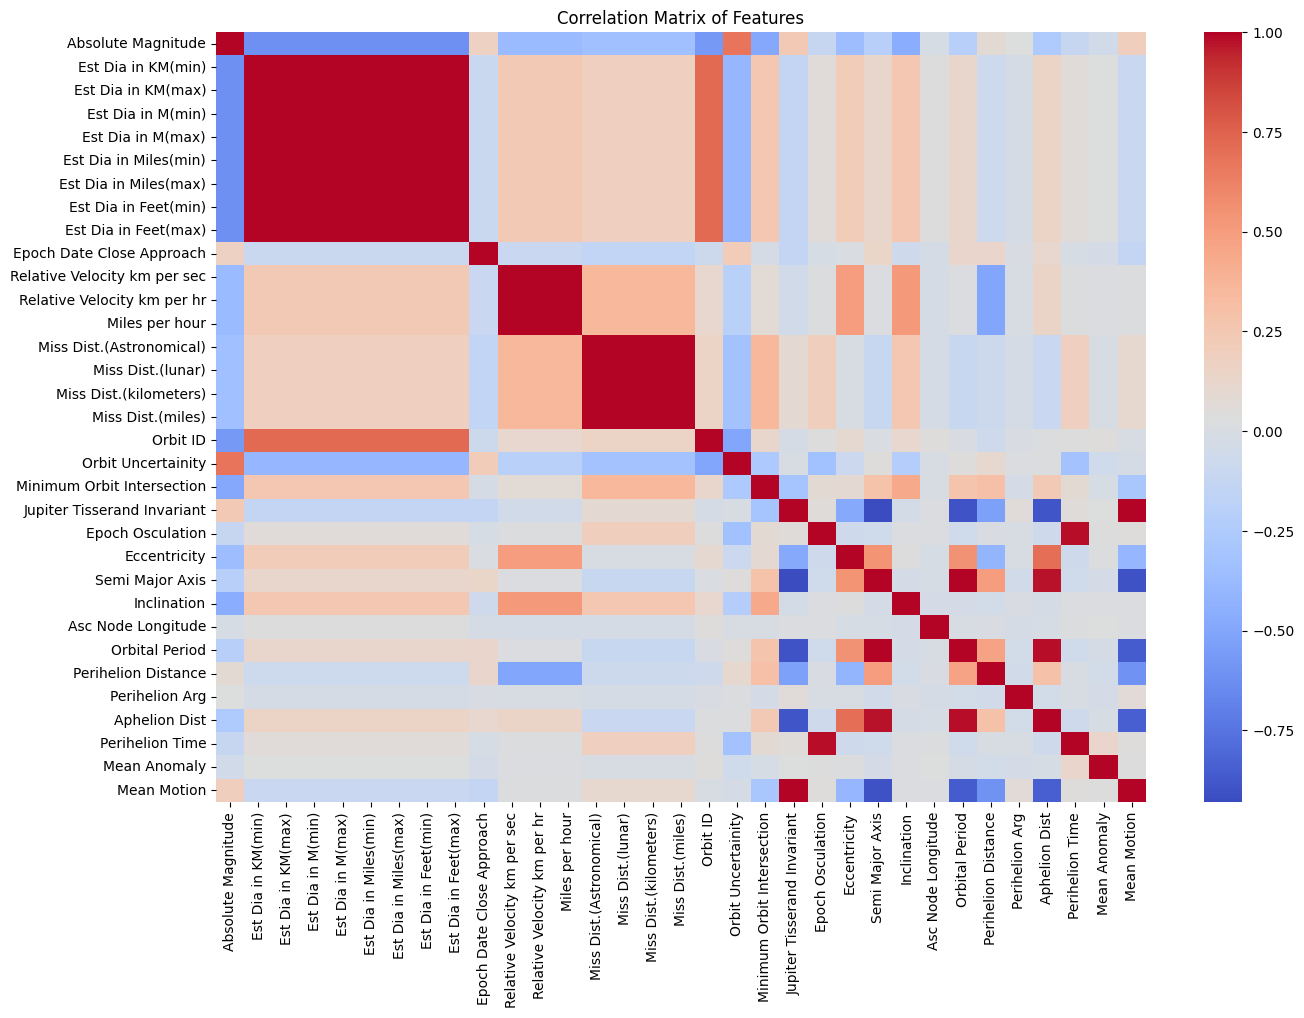

In [4]:
# Dropping non-numeric and irrelevant columns
nasa_df_analysis = nasa_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Neo Reference ID', 'Name'])

# Generating correlation matrix
correlation_matrix = nasa_df_analysis.corr()

# Visualization
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

## Dimensionality Reduction - PCA
Principal Component Analysis (PCA) was applied to reduce dimensions and observe clustering for the `Hazardous` target.

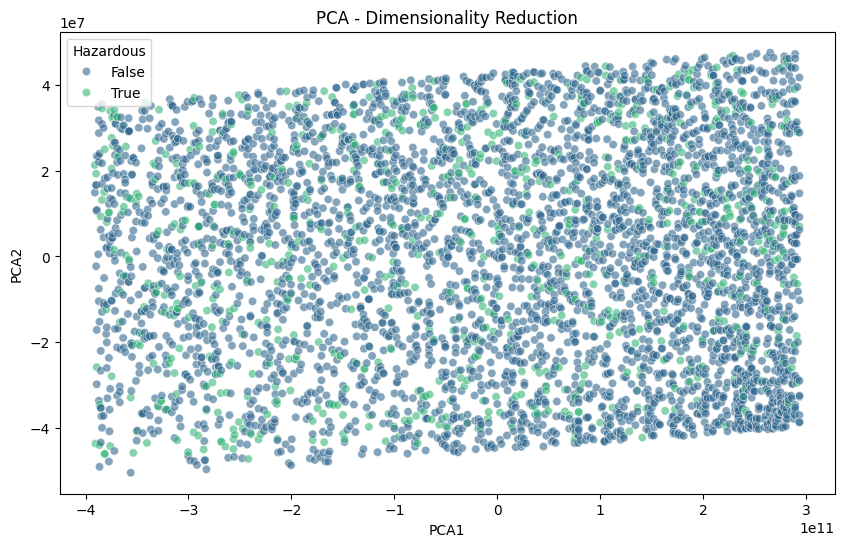

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nasa_df_analysis)
nasa_df['PCA1'] = pca_result[:, 0]
nasa_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hazardous', data=nasa_df, palette='viridis', alpha=0.6)
plt.title('PCA - Dimensionality Reduction')
plt.show()

## Dimensionality Reduction - t-SNE
t-SNE was applied to further understand clustering patterns.

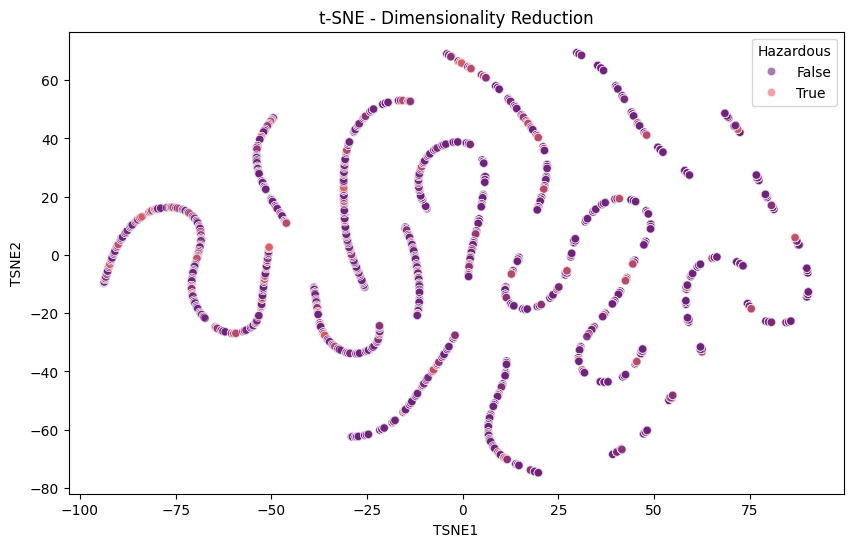

In [7]:
tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(nasa_df_analysis)
nasa_df['TSNE1'] = tsne_result[:, 0]
nasa_df['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Hazardous', data=nasa_df, palette='magma', alpha=0.6)
plt.title('t-SNE - Dimensionality Reduction')
plt.show()